<a href="https://colab.research.google.com/github/mdaiyub/Graph-Neural-Network/blob/main/Prodramp/GNN_cora_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!python -c "import torch; print(torch.version.cuda)"

11.6


In [60]:
!python -c "import torch; print(torch.__version__)"

1.13.1+cu116


In [61]:
!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.1+cu116.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html


In [62]:
import torch
from torch_geometric.data import Data

In [63]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root = "/tmp/ENZYMES", name = "ENZYMES")

In [64]:
len(dataset)

600

In [65]:
dataset.num_classes

6

In [66]:
dataset.num_node_features

3

In [67]:
dataset

ENZYMES(600)

In [68]:
data = dataset[0]
print(data)

Data(edge_index=[2, 168], x=[37, 3], y=[1])




data.x: Node feature matrix with shape [num_nodes, num_node_features]

data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long

data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]

data.y: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]

data.pos: Node position matrix with shape [num_nodes, num_dimensions]


In [69]:
data

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [70]:
from torch_geometric.utils import to_networkx

In [71]:
type(data)

torch_geometric.data.data.Data

In [72]:
networkX_graph = to_networkx(data)

In [73]:
type(networkX_graph)

networkx.classes.digraph.DiGraph

In [74]:
import networkx as nx

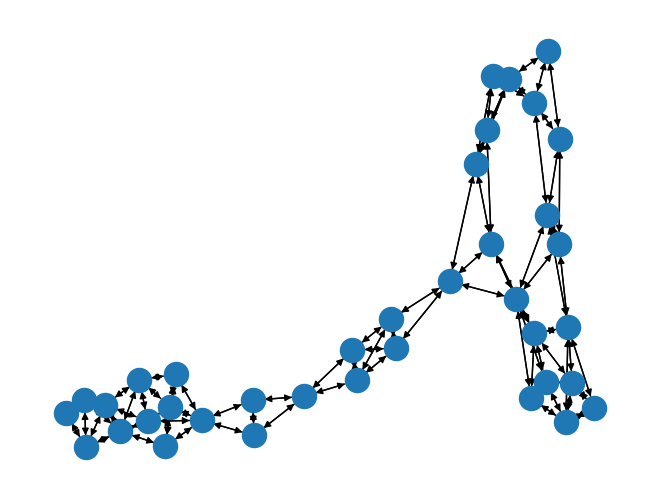

In [75]:
nx.draw(networkX_graph)

# Cora Dataset

In [76]:
from torch_geometric.datasets import Planetoid
cora_dataset = Planetoid(root='tmp/Cora', name='Cora')

In [77]:
cora_dataset

Cora()

In [78]:
cora_dataset.len()

1

In [79]:
#Number of graphs 
print("Number of graphs: ", len(cora_dataset))
#Number of features
print("Number of features: ", cora_dataset.num_features)
#Number of classes
print("Number of classes: ", cora_dataset.num_classes)

Number of graphs:  1
Number of features:  1433
Number of classes:  7


In [80]:
c_ds = cora_dataset[0]

In [81]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [82]:
# Number of nodes
print("Number of nodes: ", c_ds.num_nodes)

# Number of edges
print("Number of edges: ", c_ds.num_edges)

#check it directed
print("Is directed: ", c_ds.is_directed())

Number of nodes:  2708
Number of edges:  10556
Is directed:  False


In [83]:
c_ds.x[:0].shape

torch.Size([0, 1433])

In [84]:
c_ds.x[:1].shape

torch.Size([1, 1433])

In [85]:
# Sample nodes from the graphs
print("Shape of the sample nodes: ", c_ds.x[:5].shape)

Shape of the sample nodes:  torch.Size([5, 1433])


In [86]:
c_ds_5 = c_ds.x[:5]

In [87]:
c_ds_5.shape

torch.Size([5, 1433])

In [88]:
# Number of graphs
print("Number of graphs: ", len(c_ds_5))
print("Number of features: ", len(c_ds_5[0]))

Number of graphs:  5
Number of features:  1433


In [89]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [90]:
# check training nodes 
print("number of nodes to train on: ", c_ds.train_mask.sum().item())
#check test nodes 
print("number of nodes to test on: ", c_ds.test_mask.sum().item())
# check validation nodes
print("number of nodes to validate on: ", c_ds.val_mask.sum().item())

number of nodes to train on:  140
number of nodes to test on:  1000
number of nodes to validate on:  500


In [91]:
type(c_ds)

torch_geometric.data.data.Data

In [92]:
networkX_graph = to_networkx(c_ds)

In [93]:
type(networkX_graph)

networkx.classes.digraph.DiGraph

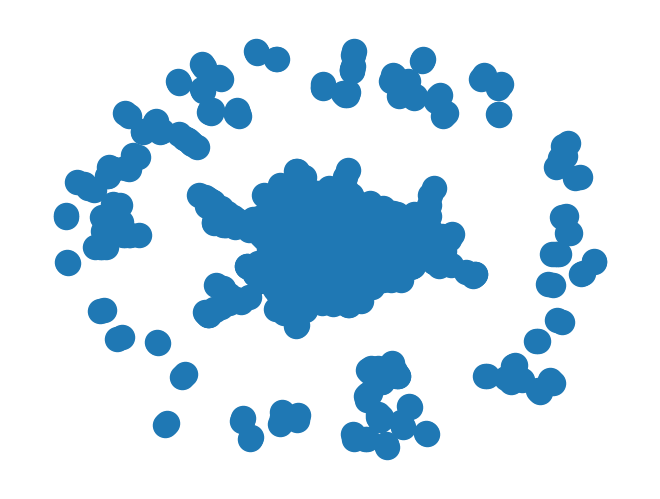

In [94]:
nx.draw(networkX_graph)

In [95]:
print(nx.is_weighted(networkX_graph))
print(nx.is_directed(networkX_graph))
print(networkX_graph.order())
print(networkX_graph.number_of_edges())
print(networkX_graph.number_of_nodes())
print(networkX_graph.edges)
print(networkX_graph.nodes)

False
True
2708
10556
2708
[(0, 633), (0, 1862), (0, 2582), (1, 2), (1, 652), (1, 654), (2, 1), (2, 332), (2, 1454), (2, 1666), (2, 1986), (3, 2544), (4, 1016), (4, 1256), (4, 1761), (4, 2175), (4, 2176), (5, 1629), (5, 1659), (5, 2546), (6, 373), (6, 1042), (6, 1416), (6, 1602), (7, 208), (8, 269), (8, 281), (8, 1996), (9, 723), (9, 2614), (10, 476), (10, 2545), (11, 1655), (11, 1839), (12, 1001), (12, 1318), (12, 2661), (12, 2662), (13, 1701), (13, 1810), (14, 158), (14, 2034), (14, 2075), (14, 2077), (14, 2668), (15, 1090), (15, 1093), (15, 1271), (15, 2367), (16, 970), (16, 1632), (16, 2444), (16, 2642), (17, 24), (17, 927), (17, 1315), (17, 1316), (17, 2140), (18, 139), (18, 1560), (18, 1786), (18, 2082), (18, 2145), (19, 1939), (20, 1072), (20, 2269), (20, 2270), (20, 2374), (20, 2375), (21, 1043), (21, 2310), (22, 39), (22, 1234), (22, 1702), (22, 1703), (22, 2238), (23, 2159), (24, 17), (24, 201), (24, 598), (24, 1636), (24, 1701), (24, 2139), (24, 2141), (25, 1301), (25, 1344)

In [96]:
c_ds.x.shape

torch.Size([2708, 1433])

In [97]:
c_ds.x[1734].shape

torch.Size([1433])

In [98]:
c_ds_10 = c_ds.x[:10]

In [99]:
c_ds_10.shape

torch.Size([10, 1433])

In [100]:
type(c_ds_10)

torch.Tensor

In [101]:
c_ds

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [102]:
nx.write_gexf(networkX_graph, 'cora_ex.gexf')

In [103]:
nx.write_graphml(networkX_graph, 'cora_ex.graphml')